In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
%matplotlib inline

In [2]:
#Global configuration
attackMode = 'Detection' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 1000 #Query Budgets
NumberOfTest = 15 #Number of test images
random.seed(42) #Set random seeds

hourglass: 0.9856477
guillotine: 0.00010379316
china_cabinet: 0.0001016978
nipple: 7.471215e-05
cougar: 6.023419e-05
dugong: 5.404314e-05


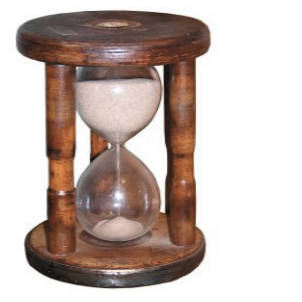

In [3]:
#Prepare test images
File,ImgPre = ResultSave('QueryAttack','./Result/InceptionD')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)

In [4]:
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        timehistory,adversarial = attack_untargeted(imgobj=image, alpha = 0.2,
                                                             beta = 0.001, max_query=queryBudgets)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)


round 0: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:1.3018028736114502, Linf:0.009649820625782013
round 1: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:84.7372055053711, Linf:0.39826130867004395
round 2: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:105.185302734375, Linf:0.572686493396759
round 3: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:16.31534767150879, Linf:0.10581925511360168
round 4: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:136.2220001220703, Linf:0.5937849879264832
round 5: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:54.20774841308594, Linf:0.31942063570022583
round 6: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:1.5460013151168823, Linf:0.010412335395812988
round 7: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:86.87467956542969, Linf:0.4828280806541443
round 8: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:56.6789436340332, Linf:0.3478383421897888
round 9: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:168.82586669921875, Linf:0.6915292739868164
round 10: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:0.6902253031730652, Linf:0.006704568862915039
round 11: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:123.9325180053711, Linf:0.4978739023208618
round 12: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:66.29769897460938, Linf:0.378848135471344
round 13: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:27.7696475982666, Linf:0.17851656675338745
round 14: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:197.5649871826172, Linf:0.8024932742118835


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(331, 2)
3
66.29769897460938
0.378848135471344


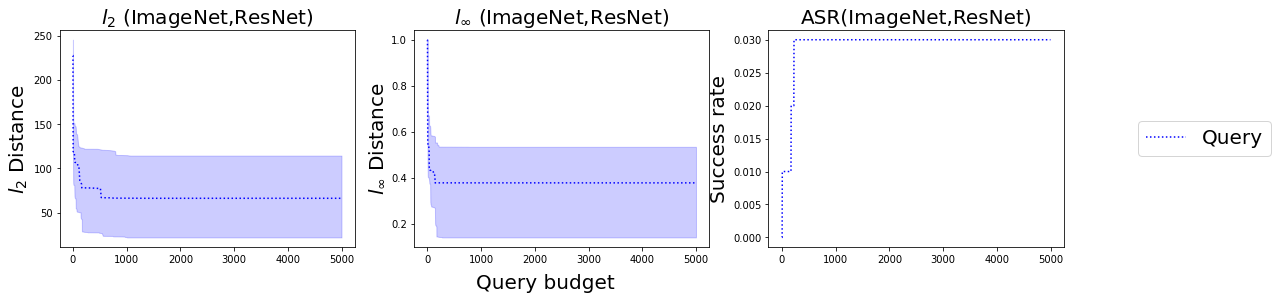

In [5]:
from Visualization import Result
Valid=100
fontsize=20
Range=5000
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))
#Ver3.Plot(0,Valid,1000,ax1)
vis.Plot(0,Valid,Range,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,Range,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,Range,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)